In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import sys
import json
import prince
from datetime import timedelta, date, datetime
from mpl_toolkits.mplot3d import Axes3D
# from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
# from kneed import KneeLocator
from sklearn.cluster import KMeans
# from light_famd import MCA,FAMD
from scipy import stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
path = os.getcwd() + '/DataForClusterization.csv'
data = pd.read_csv(path)
data

,Unnamed: 0,Date,Week_Day,Month,User_Activity,Food_Count,total_calories,total_carbs,total_fat,total_protein,...,goal_sodium,goal_sugar,goal_fiber,diff_calories,diff_carbs,diff_fat,diff_protein,diff_sodium,diff_sugar,diff_fiber
0,0,2014-09-14,Sunday,September,56,164,73701.0,6196.0,2877.0,3379.0,...,68500.0,1858.0,1047.0,-26507.0,-2862.0,-542.0,-2951.0,-9608.0,57.0,-548.0
1,1,2014-09-15,Monday,September,280,909,405220.0,39757.0,15061.0,22073.0,...,406900.0,11154.0,3874.0,-120875.0,-12829.0,-3024.0,-11912.0,-49466.0,-365.0,-1761.0
2,2,2014-09-16,Tuesday,September,279,924,400237.0,40230.0,14044.0,22207.0,...,403500.0,11127.0,3857.0,-116354.0,-12571.0,-3564.0,-10617.0,-66455.0,-1611.0,-1592.0
3,3,2014-09-17,Wednesday,September,274,861,402535.0,39267.0,14585.0,21971.0,...,387400.0,11141.0,3876.0,-107952.0,-12238.0,-2827.0,-10776.0,-59776.0,-1651.0,-1630.0
4,4,2014-09-18,Thursday,September,382,1342,541442.0,53949.0,19930.0,29552.0,...,559100.0,14571.0,5478.0,-143172.0,-14643.0,-4089.0,-13986.0,-91288.0,-2097.0,-1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,2015-04-05,Sunday,April,515,1766,710073.0,66273.0,26095.0,34380.0,...,796050.0,20594.0,6249.0,-215289.0,-29321.0,-4724.0,-26011.0,-164363.0,-6475.0,-3294.0
204,204,2015-04-06,Monday,April,574,1940,745455.0,74221.0,27560.0,42725.0,...,896850.0,23351.0,7116.0,-307397.0,-35018.0,-7303.0,-26028.0,-214917.0,-7051.0,-2948.0
205,205,2015-04-07,Tuesday,April,351,1276,453123.0,45123.0,17046.0,26786.0,...,559550.0,14365.0,4147.0,-178125.0,-21172.0,-4245.0,-14094.0,-137787.0,-3938.0,-1428.0
206,206,2015-04-08,Wednesday,April,132,480,153984.0,14922.0,6191.0,8971.0,...,224400.0,5382.0,1561.0,-86861.0,-9824.0,-2090.0,-6406.0,-69690.0,-2176.0,-555.0


Text(0.5, 1.0, 'Days')

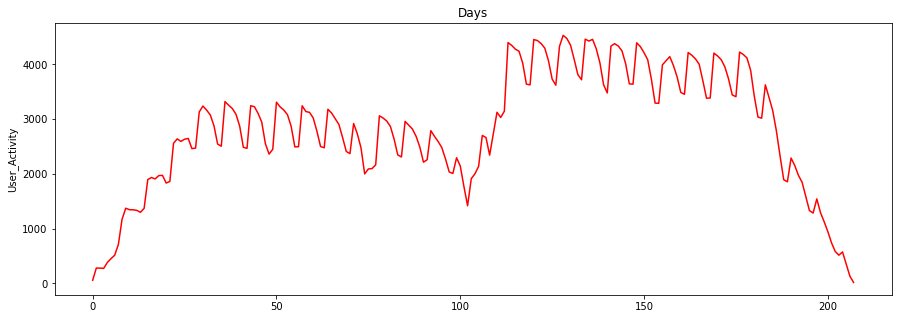

In [4]:
plt.figure(figsize=(15,5))
plt.plot(data['User_Activity'], color='red')
plt.ylabel('User_Activity')
plt.title('Days')

In [5]:
def getDayNum(Day):
    if(Day == "Monday"): return 1
    if(Day == "Tuesday"): return 2
    if(Day == "Wednesday"): return 3
    if(Day == "Thursday"): return 4
    if(Day == "Friday"): return 5
    if(Day == "Saturday"): return 6
    if(Day == "Sunday"): return 7

In [6]:
data_point= {}
data_point['total_calories'] = data["total_calories"]
# data_point['Week_Day'] = data["Week_Day"]
data_point['total_carbs'] = data["total_carbs"]
data_point['total_fat'] = data["total_fat"]
data_point['total_protein'] = data["total_protein"]
data_point['total_sodium'] = data["total_sodium"]
data_point['total_sugar'] = data["total_sugar"]
data_point['total_fiber'] = data["total_fiber"]



# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point = pd.DataFrame(data_point)
data_point


,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,73701.0,6196.0,2877.0,3379.0,58892.0,1915.0,499.0
1,405220.0,39757.0,15061.0,22073.0,357434.0,10789.0,2113.0
2,400237.0,40230.0,14044.0,22207.0,337045.0,9516.0,2265.0
3,402535.0,39267.0,14585.0,21971.0,327624.0,9490.0,2246.0
4,541442.0,53949.0,19930.0,29552.0,467812.0,12474.0,3510.0
...,...,...,...,...,...,...,...
203,710073.0,66273.0,26095.0,34380.0,631687.0,14119.0,2955.0
204,745455.0,74221.0,27560.0,42725.0,681933.0,16300.0,4168.0
205,453123.0,45123.0,17046.0,26786.0,421763.0,10427.0,2719.0
206,153984.0,14922.0,6191.0,8971.0,154710.0,3206.0,1006.0


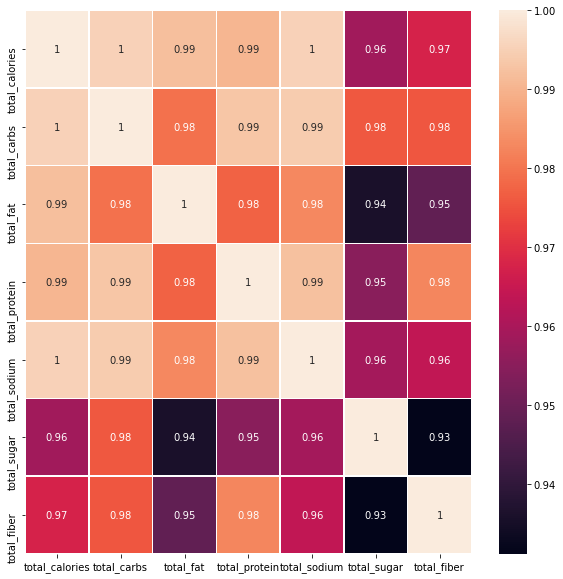

In [7]:
correlation_map = data_point.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation_map, annot=True, linewidths=.5, ax=ax)
plt.show() 

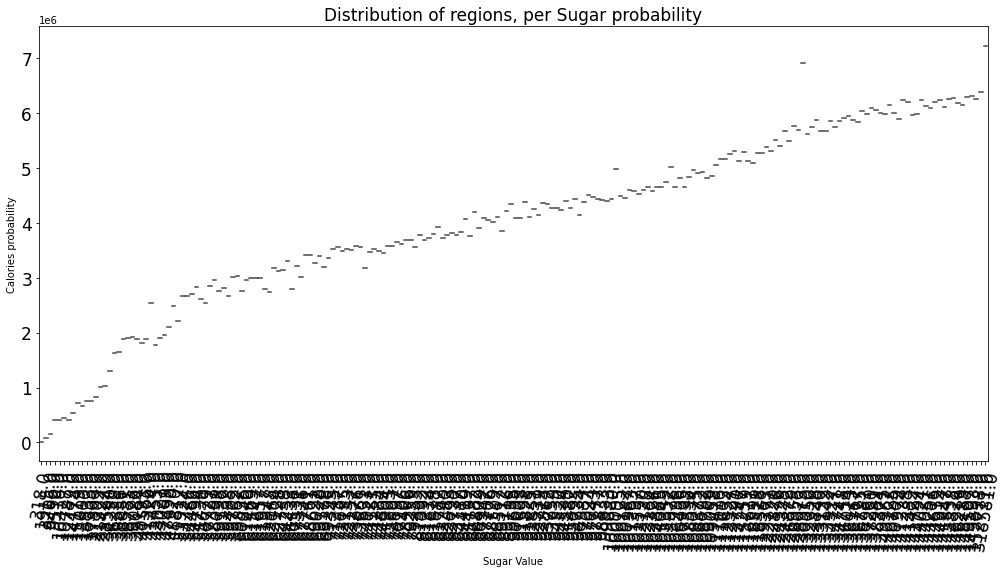

In [8]:
_, ax = plt.subplots(figsize=(17, 8))
sns.violinplot(ax=ax, x="total_sugar", y="total_calories", data=data_point)
plt.title('Distribution of regions, per Sugar probability', fontsize=17)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Sugar Value')
plt.ylabel('Calories probability')
plt.show()


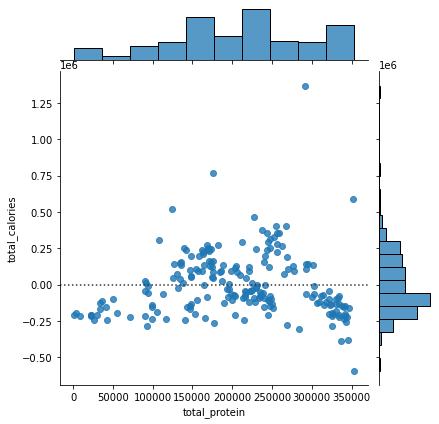

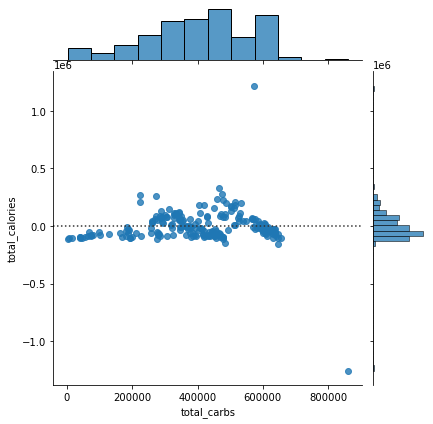

In [9]:
sns.jointplot(x="total_protein", y="total_calories", data=data_point,kind = 'resid')
sns.jointplot(x="total_carbs", y="total_calories", data=data_point,kind = 'resid')

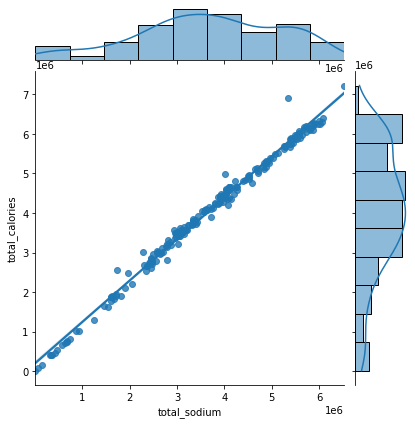

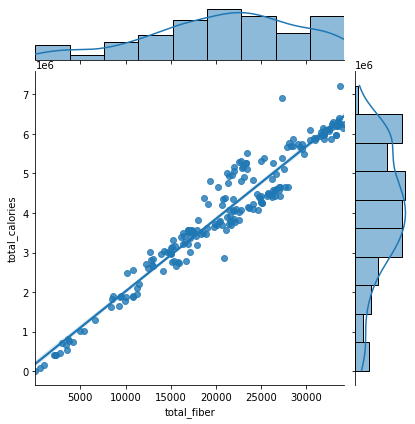

In [10]:
sns.jointplot(x="total_sodium", y="total_calories", data=data_point,kind = 'reg')
sns.jointplot(x="total_fiber", y="total_calories", data=data_point,kind = 'reg')

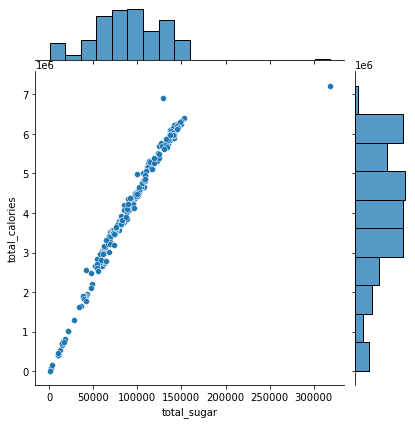

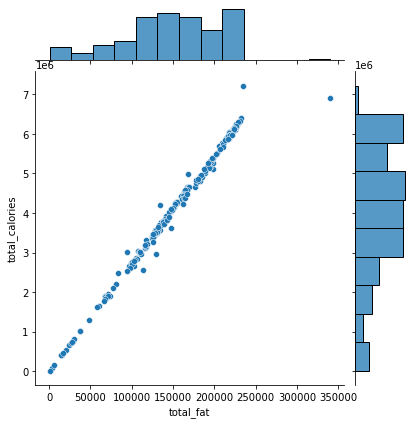

In [11]:
sns.jointplot(x="total_sugar", y="total_calories", data=data_point,kind = 'scatter')
sns.jointplot(x="total_fat", y="total_calories", data=data_point,kind = 'scatter')

In [12]:
data_point= {}
# data_point['Week_Day'] = data["Week_Day"]
data_point['total_carbs'] = data["total_carbs"]
data_point['total_fat'] = data["total_fat"]
data_point['total_protein'] = data["total_protein"]
data_point['total_sodium'] = data["total_sodium"]
data_point['total_sugar'] = data["total_sugar"]
data_point['total_fiber'] = data["total_fiber"]



# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point = pd.DataFrame(data_point)
data_point


,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,6196.0,2877.0,3379.0,58892.0,1915.0,499.0
1,39757.0,15061.0,22073.0,357434.0,10789.0,2113.0
2,40230.0,14044.0,22207.0,337045.0,9516.0,2265.0
3,39267.0,14585.0,21971.0,327624.0,9490.0,2246.0
4,53949.0,19930.0,29552.0,467812.0,12474.0,3510.0
...,...,...,...,...,...,...
203,66273.0,26095.0,34380.0,631687.0,14119.0,2955.0
204,74221.0,27560.0,42725.0,681933.0,16300.0,4168.0
205,45123.0,17046.0,26786.0,421763.0,10427.0,2719.0
206,14922.0,6191.0,8971.0,154710.0,3206.0,1006.0


In [13]:
data_point.describe([0.99])

,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,402465.975962,147793.504808,208415.278846,3.652665e+06,89363.427885,20931.778846
std,163067.255878,58897.607774,86114.491822,1.510791e+06,40546.267692,8398.945831
min,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,647603.010000,232542.020000,346694.900000,6.058767e+06,149690.650000,33741.710000
max,861344.000000,339976.000000,353634.000000,6.525403e+06,318581.000000,34191.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler
def normalize(data,col):
    norm = MinMaxScaler().fit(data[[col]])
    data[col] = norm.transform(data[[col]])

In [15]:
# normalize(data_point,"total_carbs")
# normalize(data_point,"total_fat")
# normalize(data_point,"total_protein")
# normalize(data_point,"total_sodium")
# normalize(data_point,"total_sugar")
# normalize(data_point,"Week_Day")r


data_point.filter(data_point['total_carbs']<=647603.010000)
data_point.loc[(data_point['total_carbs']>647603.010000),['total_carbs']] = 647603.010000
data_point.loc[(data_point['total_fat']>232542.020000),['total_fat']] = 232542.020000
data_point.loc[(data_point['total_sodium']>6.058767e+06),['total_sodium']] = 6.058767e+06
data_point.loc[(data_point['total_sugar']>149690.650000),['total_sugar']] = 149690.650000



data_point.describe([0.99])


,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,401391.384760,147265.591635,208415.278846,3.650349e+06,88536.898798,20931.778846
std,160745.841333,57645.061816,86114.491822,1.506727e+06,37486.881349,8398.945831
min,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,647521.179300,232417.418600,346694.900000,6.055781e+06,149683.814500,33741.710000
max,647603.010000,232542.020000,353634.000000,6.058767e+06,149690.650000,34191.000000


In [16]:
# normalize(data_point,"total_carbs")
# normalize(data_point,"total_fat")
# normalize(data_point,"total_protein")
# normalize(data_point,"total_sodium")
# normalize(data_point,"total_sugar")
# normalize(data_point,"Week_Day")r
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def normalizeDropAndAdd(data, name):
    normalized_age_data = NormalizeData(data[name])
    data[name] = normalized_age_data
    
normalizeDropAndAdd(data_point, 'total_carbs')
normalizeDropAndAdd(data_point, 'total_fat')
normalizeDropAndAdd(data_point, 'total_protein')
normalizeDropAndAdd(data_point, 'total_sodium')
normalizeDropAndAdd(data_point, 'total_sugar')
normalizeDropAndAdd(data_point, 'total_fiber')


data_point.describe()

,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.618819,0.632597,0.588159,0.601476,0.590596,0.611781
std,0.248864,0.248357,0.244221,0.249320,0.250962,0.245914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458778,0.494351,0.434343,0.443396,0.413690,0.460268
50%,0.643953,0.640235,0.608575,0.613558,0.596689,0.636309
75%,0.793123,0.839085,0.749371,0.805377,0.774673,0.790069
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
sorted(data_point)

Q1=data_point.quantile(0.25)
Q3=data_point.quantile(0.75)
IQR=Q3-Q1
# print(data_point < (Q1 - 1.5 * IQR)) |(data_point > (Q3 + 1.5 * IQR))

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objs as go

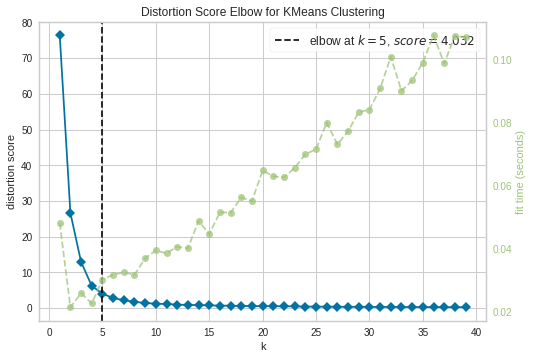

In [19]:
visualizer = kelbow_visualizer(KMeans(random_state=5), data_point, k=(1,40))
visualizer.show()
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4).fit(data_point)

for i in range(50):
    kmeans1 = KMeans(n_clusters=5).fit(data_point)
    if kmeans1.inertia_ < kmeans.inertia_:
        kmeans = kmeans1

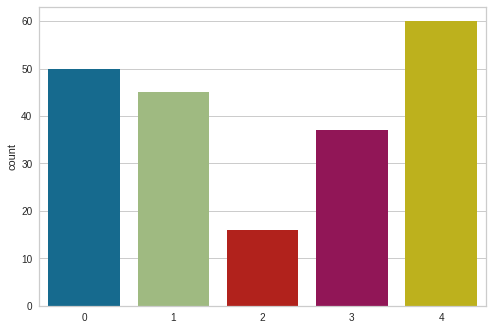

In [21]:
sns.countplot(x=kmeans.labels_)
plt.show()
# fig = go.Figure(data=[go.Pie(labels=kmeans.labels_,hole=.4)])
# fig.show()

In [22]:
labels = np.asarray(kmeans.predict(data_point))

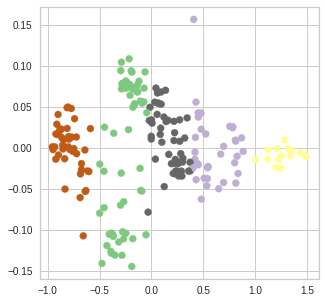

In [23]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_point)

plt.figure(figsize=(5,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=labels, cmap=plt.cm.get_cmap('Accent_r', 10))
plt.show()

In [24]:
copyData = data_point.copy()
labels = np.asarray(kmeans.predict(data_point))
copyData.insert(0, 'Cluster#', labels, True)
for x in copyData['Cluster#']:
    print(x)

2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
4
4
4
4
0
0
0
4
4
4
4
0
0
0
4
4
4
4
0
0
0
4
4
4
4
0
0
0
4
4
4
4
0
0
0
4
4
4
4
0
0
0
4
0
0
3
3
3
3
4
4
4
0
0
0
0
4
4
0
0
0
3
0
0
0
0
0
0
3
3
0
3
3
3
3
3
3
0
0
0
0
4
4
4
1
1
1
1
1
4
4
1
1
1
1
1
4
4
1
1
1
1
1
4
4
1
1
1
1
1
4
4
1
1
1
1
1
4
4
1
1
1
1
4
4
4
1
1
1
1
4
4
4
1
1
1
1
4
4
4
1
1
1
1
4
4
4
1
1
1
1
4
4
0
4
4
4
0
0
3
3
0
0
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2


In [25]:
# fig_dims = (10, 5)
# fig, ax = plt.subplots(figsize=fig_dims)
# sns.countplot('total_carbs', hue='Cluster#', data=copyData);
copyData

,Cluster#,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,2,0.006984,0.010517,0.006676,0.007194,0.010691,0.013527
1,2,0.058942,0.063010,0.059692,0.056594,0.070100,0.060784
2,2,0.059675,0.058628,0.060072,0.053220,0.061578,0.065234
3,2,0.058184,0.060959,0.059403,0.051662,0.061403,0.064678
4,2,0.080914,0.083987,0.080903,0.074859,0.081380,0.101686
...,...,...,...,...,...,...,...
203,2,0.099994,0.110549,0.094595,0.101975,0.092393,0.085437
204,2,0.112299,0.116860,0.118261,0.110289,0.106994,0.120952
205,2,0.067250,0.071562,0.073058,0.067239,0.067676,0.078527
206,2,0.020493,0.024795,0.022535,0.023049,0.019334,0.028371


In [26]:
data_point_goals= {}
# data_point['Week_Day'] = data["Week_Day"]
data_point_goals['goal_carbs'] = data["goal_carbs"]
data_point_goals['goal_fat'] = data["goal_fat"]
data_point_goals['goal_protein'] = data["goal_protein"]
data_point_goals['goal_sodium'] = data["goal_sodium"]
data_point_goals['goal_sugar'] = data["goal_sugar"]
data_point_goals['goal_fiber'] = data["goal_fiber"]


# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point_goals = pd.DataFrame(data_point_goals)
data_point_goals

,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,goal_fiber
0,9058.0,3419.0,6330.0,68500.0,1858.0,1047.0
1,52586.0,18085.0,33985.0,406900.0,11154.0,3874.0
2,52801.0,17608.0,32824.0,403500.0,11127.0,3857.0
3,51505.0,17412.0,32747.0,387400.0,11141.0,3876.0
4,68592.0,24019.0,43538.0,559100.0,14571.0,5478.0
...,...,...,...,...,...,...
203,95594.0,30819.0,60391.0,796050.0,20594.0,6249.0
204,109239.0,34863.0,68753.0,896850.0,23351.0,7116.0
205,66295.0,21291.0,40880.0,559550.0,14365.0,4147.0
206,24746.0,8281.0,15377.0,224400.0,5382.0,1561.0


In [27]:
data_point_goals.describe([0.99])

,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,goal_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,537656.889423,171963.855769,322446.639423,4.358693e+06,114521.687500,35354.745192
std,210740.716301,66979.873370,124417.285413,1.759624e+06,47719.241873,12948.992236
min,3257.000000,948.000000,1913.000000,2.770000e+04,565.000000,148.000000
50%,550938.000000,175908.500000,334804.500000,4.413875e+06,113110.000000,37675.500000
99%,859739.730000,271416.110000,508902.020000,7.055366e+06,191395.930000,53822.510000
max,869339.000000,275627.000000,514647.000000,7.126050e+06,197483.000000,54484.000000


In [28]:
normalizeDropAndAdd(data_point_goals, 'goal_carbs')
normalizeDropAndAdd(data_point_goals, 'goal_fat')
normalizeDropAndAdd(data_point_goals, 'goal_protein')
normalizeDropAndAdd(data_point_goals, 'goal_sodium')
normalizeDropAndAdd(data_point_goals, 'goal_sugar')
normalizeDropAndAdd(data_point_goals, 'goal_fiber')


data_point_goals.describe()

,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,goal_fiber
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.617032,0.622603,0.625146,0.610141,0.578701,0.647945
std,0.243327,0.243848,0.242655,0.247892,0.242331,0.238313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.481477,0.491114,0.494297,0.461806,0.439759,0.514305
50%,0.632366,0.636964,0.649248,0.617915,0.571532,0.690656
75%,0.806249,0.815478,0.811485,0.814469,0.786397,0.804835
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


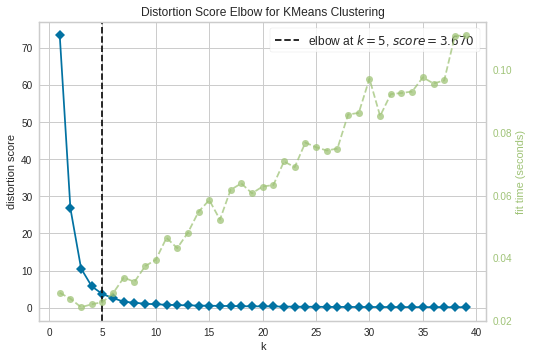

In [29]:
visualizer = kelbow_visualizer(KMeans(random_state=5), data_point_goals, k=(1,40))
visualizer.show()
plt.show()

In [30]:
kmeans_goals = KMeans(n_clusters=5).fit(data_point_goals)

for i in range(50):
    kmeans1 = KMeans(n_clusters=5).fit(data_point_goals)
    if kmeans1.inertia_ < kmeans_goals.inertia_:
        kmeans_goals = kmeans1

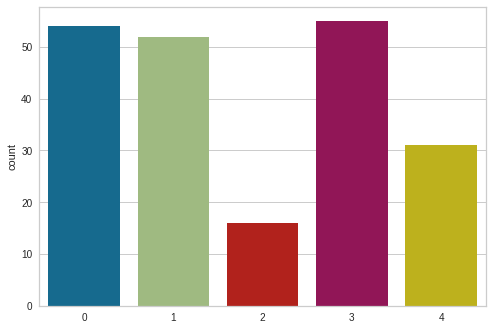

In [31]:
sns.countplot(x=kmeans_goals.labels_)
plt.show()

In [32]:
labels_goals = np.asarray(kmeans_goals.predict(data_point_goals))

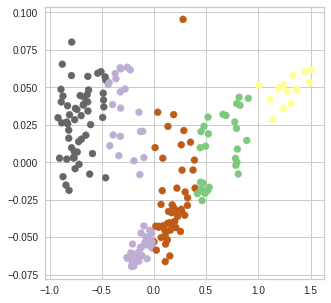

In [33]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_point_goals)

plt.figure(figsize=(5,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=labels_goals, cmap=plt.cm.get_cmap('Accent_r', 10))
plt.show()

In [34]:
data_point_diffs= {}
# data_point['Week_Day'] = data["Week_Day"]
data_point_diffs['diff_carbs'] = data["diff_carbs"]
data_point_diffs['diff_fat'] = data["diff_fat"]
data_point_diffs['diff_protein'] = data["diff_protein"]
data_point_diffs['diff_sodium'] = data["diff_sodium"]
data_point_diffs['diff_sugar'] = data["diff_sugar"]
data_point_diffs['diff_fiber'] = data["diff_fiber"]



# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point_diffs = pd.DataFrame(data_point_diffs)
data_point_diffs

,diff_carbs,diff_fat,diff_protein,diff_sodium,diff_sugar,diff_fiber
0,-2862.0,-542.0,-2951.0,-9608.0,57.0,-548.0
1,-12829.0,-3024.0,-11912.0,-49466.0,-365.0,-1761.0
2,-12571.0,-3564.0,-10617.0,-66455.0,-1611.0,-1592.0
3,-12238.0,-2827.0,-10776.0,-59776.0,-1651.0,-1630.0
4,-14643.0,-4089.0,-13986.0,-91288.0,-2097.0,-1968.0
...,...,...,...,...,...,...
203,-29321.0,-4724.0,-26011.0,-164363.0,-6475.0,-3294.0
204,-35018.0,-7303.0,-26028.0,-214917.0,-7051.0,-2948.0
205,-21172.0,-4245.0,-14094.0,-137787.0,-3938.0,-1428.0
206,-9824.0,-2090.0,-6406.0,-69690.0,-2176.0,-555.0


In [35]:
data_point_diffs.describe([0.99])

,diff_carbs,diff_fat,diff_protein,diff_sodium,diff_sugar,diff_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,-135190.913462,-24170.350962,-114031.360577,-7.060280e+05,-25158.259615,-14422.966346
std,53862.127200,14248.096972,41086.179486,2.749064e+05,15905.145219,4932.439053
min,-270732.000000,-61922.000000,-199863.000000,-1.179731e+06,-55899.000000,-21165.000000
50%,-136672.500000,-25206.500000,-118087.500000,-7.354175e+05,-23127.000000,-15336.500000
99%,-3349.340000,11802.130000,-6700.770000,-1.488767e+04,-255.260000,-616.110000
max,1579.000000,96348.000000,-888.000000,2.548240e+05,131168.000000,-111.000000


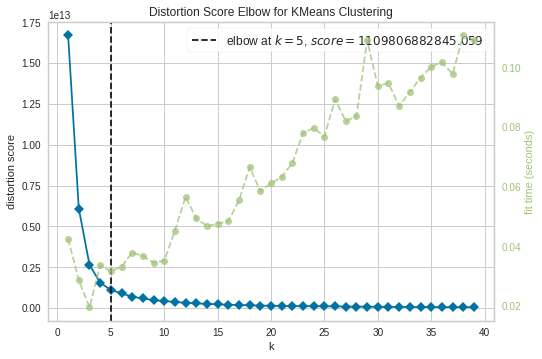

In [36]:
visualizer = kelbow_visualizer(KMeans(random_state=5), data_point_diffs, k=(1,40))
visualizer.show()
plt.show()

In [37]:
kmeans_diffs = KMeans(n_clusters=5).fit(data_point_diffs)

for i in range(50):
    kmeans1 = KMeans(n_clusters=5).fit(data_point_diffs)
    if kmeans1.inertia_ < kmeans_diffs.inertia_:
        kmeans_diffs = kmeans1

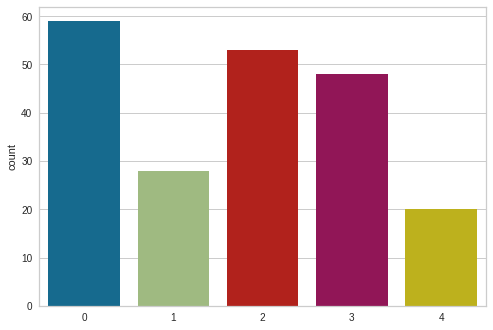

In [38]:
sns.countplot(x=kmeans_diffs.labels_)
plt.show()

In [39]:
labels_diffs = np.asarray(kmeans_diffs.predict(data_point_diffs))

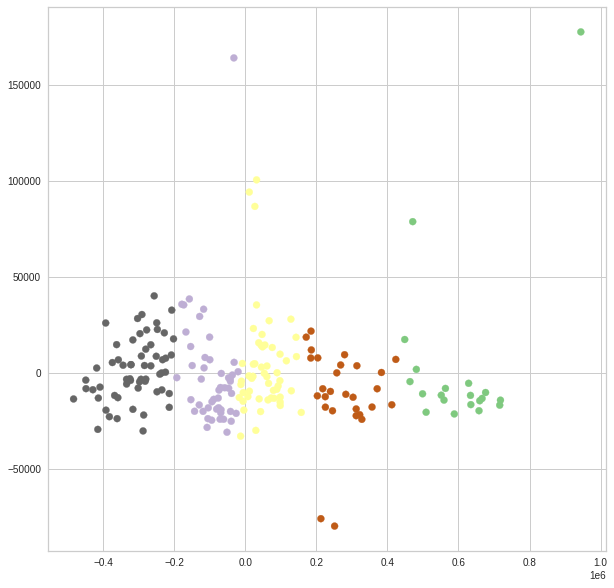

In [40]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_point_diffs)

plt.figure(figsize=(10,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=labels_diffs, cmap=plt.cm.get_cmap('Accent_r', 10))
plt.show()

In [41]:
data_point= {}
data_point['Week_Day'] = data["Week_Day"]
data_point['total_carbs'] = data["total_carbs"]
data_point['total_fat'] = data["total_fat"]
data_point['total_protein'] = data["total_protein"]
data_point['total_sodium'] = data["total_sodium"]
data_point['total_sugar'] = data["total_sugar"]
data_point['total_fiber'] = data["total_fiber"]



for i in range(len(data_point['Week_Day'])):
    data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point = pd.DataFrame(data_point)
data_point

,Week_Day,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,7,6196.0,2877.0,3379.0,58892.0,1915.0,499.0
1,1,39757.0,15061.0,22073.0,357434.0,10789.0,2113.0
2,2,40230.0,14044.0,22207.0,337045.0,9516.0,2265.0
3,3,39267.0,14585.0,21971.0,327624.0,9490.0,2246.0
4,4,53949.0,19930.0,29552.0,467812.0,12474.0,3510.0
...,...,...,...,...,...,...,...
203,7,66273.0,26095.0,34380.0,631687.0,14119.0,2955.0
204,1,74221.0,27560.0,42725.0,681933.0,16300.0,4168.0
205,2,45123.0,17046.0,26786.0,421763.0,10427.0,2719.0
206,3,14922.0,6191.0,8971.0,154710.0,3206.0,1006.0


In [42]:
data_point.describe([0.99])

,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,402465.975962,147793.504808,208415.278846,3.652665e+06,89363.427885,20931.778846
std,163067.255878,58897.607774,86114.491822,1.510791e+06,40546.267692,8398.945831
min,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,647603.010000,232542.020000,346694.900000,6.058767e+06,149690.650000,33741.710000
max,861344.000000,339976.000000,353634.000000,6.525403e+06,318581.000000,34191.000000


In [43]:

data_point.filter(data_point['total_carbs']<=647603.010000)
data_point.loc[(data_point['total_carbs']>647603.010000),['total_carbs']] = 647603.010000
data_point.loc[(data_point['total_fat']>232542.020000),['total_fat']] = 232542.020000
data_point.loc[(data_point['total_sodium']>6.058767e+06),['total_sodium']] = 6.058767e+06
data_point.loc[(data_point['total_sugar']>149690.650000),['total_sugar']] = 149690.650000


In [44]:
data_point.describe([0.99])

,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,401391.384760,147265.591635,208415.278846,3.650349e+06,88536.898798,20931.778846
std,160745.841333,57645.061816,86114.491822,1.506727e+06,37486.881349,8398.945831
min,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,647521.179300,232417.418600,346694.900000,6.055781e+06,149683.814500,33741.710000
max,647603.010000,232542.020000,353634.000000,6.058767e+06,149690.650000,34191.000000


Max total_fiber:  2015-01-13
Max tot Prot:  2015-01-15
Max tot Carbs:  2015-01-20
Max tot Fat:  2015-01-20
Max total_sodium:  2015-01-20
Max total_sugar:  2015-01-20
Max tot Carbs:  2015-01-21
Max tot Fat:  2015-01-21
Max total_sodium:  2015-01-21
Max total_sugar:  2015-01-21
Max tot Carbs:  2015-01-26
Max total_sugar:  2015-01-26
Max total_sodium:  2015-01-28
Max tot Fat:  2015-01-30
['2015-01-13', '2015-01-15', '2015-01-20', '2015-01-20', '2015-01-20', '2015-01-20', '2015-01-21', '2015-01-21', '2015-01-21', '2015-01-21', '2015-01-26', '2015-01-26', '2015-01-28', '2015-01-30']


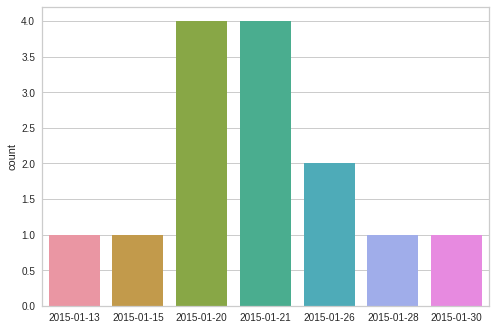

In [45]:
max_dates = []
for i in range(208):
    if(data_point['total_carbs'][i] == 647603.010000):
        print("Max tot Carbs:  "+data['Date'][i])
        max_dates.append(data['Date'][i])
    if(data_point['total_fat'][i] == 232542.020000):
        print("Max tot Fat:  "+data['Date'][i])
        max_dates.append(data['Date'][i])
    if(data_point['total_protein'][i] == 353634.000000):
        max_dates.append(data['Date'][i])
        print("Max tot Prot:  "+data['Date'][i])
    if(data_point['total_sodium'][i] == 6.058767e+06):
        print("Max total_sodium:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
    if(data_point['total_sugar'][i] == 149690.650000):
        print("Max total_sugar:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
    if(data_point['total_fiber'][i] == 34191.000000):
        print("Max total_fiber:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
print(max_dates)
sns.countplot(x=max_dates)
plt.show()

In [46]:
data_point_goals= {}
# data_point['Week_Day'] = data["Week_Day"]
data_point_goals['goal_carbs'] = data["goal_carbs"]
data_point_goals['goal_fat'] = data["goal_fat"]
data_point_goals['goal_protein'] = data["goal_protein"]
data_point_goals['goal_sodium'] = data["goal_sodium"]
data_point_goals['goal_sugar'] = data["goal_sugar"]
data_point_goals['goal_fiber'] = data["goal_fiber"]


# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point_goals = pd.DataFrame(data_point_goals)
data_point_goals.describe([0.99])

,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,goal_fiber
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,537656.889423,171963.855769,322446.639423,4.358693e+06,114521.687500,35354.745192
std,210740.716301,66979.873370,124417.285413,1.759624e+06,47719.241873,12948.992236
min,3257.000000,948.000000,1913.000000,2.770000e+04,565.000000,148.000000
50%,550938.000000,175908.500000,334804.500000,4.413875e+06,113110.000000,37675.500000
99%,859739.730000,271416.110000,508902.020000,7.055366e+06,191395.930000,53822.510000
max,869339.000000,275627.000000,514647.000000,7.126050e+06,197483.000000,54484.000000


Max goal_protein:  2015-01-12
Max goal_fiber:  2015-01-12
Max goal_carbs:  2015-01-20
Max goal_fat:  2015-01-20
Max total_sodium:  2015-01-20
Max goal_sugar:  2015-02-09
['2015-01-12', '2015-01-12', '2015-01-20', '2015-01-20', '2015-01-20', '2015-02-09']


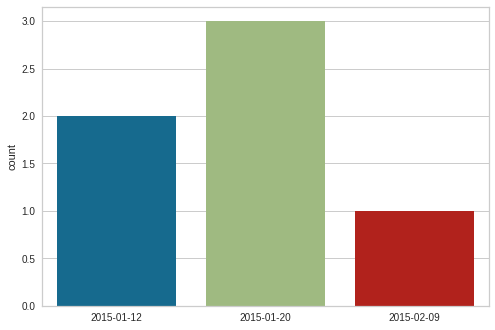

In [47]:
max_dates = []
for i in range(208):
    if(data_point_goals['goal_carbs'][i] == 869339.000000):
        print("Max goal_carbs:  "+data['Date'][i])
        max_dates.append(data['Date'][i])
    if(data_point_goals['goal_fat'][i] == 275627.000000):
        print("Max goal_fat:  "+data['Date'][i])
        max_dates.append(data['Date'][i])
    if(data_point_goals['goal_protein'][i] == 514647.000000):
        max_dates.append(data['Date'][i])
        print("Max goal_protein:  "+data['Date'][i])
    if(data_point_goals['goal_sodium'][i] == 7.126050e+06):
        print("Max total_sodium:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
    if(data_point_goals['goal_sugar'][i] == 197483.000000):
        print("Max goal_sugar:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
    if(data_point_goals['goal_fiber'][i] == 54484.000000):
        print("Max goal_fiber:  "+data['Date'][i]) 
        max_dates.append(data['Date'][i])
print(max_dates)
sns.countplot(x=max_dates)
plt.show()

In [48]:
normalizeDropAndAdd(data_point, 'total_carbs')
normalizeDropAndAdd(data_point, 'total_fat')
normalizeDropAndAdd(data_point, 'total_protein')
normalizeDropAndAdd(data_point, 'total_sodium')
normalizeDropAndAdd(data_point, 'total_sugar')
normalizeDropAndAdd(data_point, 'total_fiber')
data_point.describe()

,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.618819,0.632597,0.588159,0.601476,0.590596,0.611781
std,0.248864,0.248357,0.244221,0.249320,0.250962,0.245914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458778,0.494351,0.434343,0.443396,0.413690,0.460268
50%,0.643953,0.640235,0.608575,0.613558,0.596689,0.636309
75%,0.793123,0.839085,0.749371,0.805377,0.774673,0.790069
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_point

,Week_Day,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,7,0.006984,0.010517,0.006676,0.007194,0.010691,0.013527
1,1,0.058942,0.063010,0.059692,0.056594,0.070100,0.060784
2,2,0.059675,0.058628,0.060072,0.053220,0.061578,0.065234
3,3,0.058184,0.060959,0.059403,0.051662,0.061403,0.064678
4,4,0.080914,0.083987,0.080903,0.074859,0.081380,0.101686
...,...,...,...,...,...,...,...
203,7,0.099994,0.110549,0.094595,0.101975,0.092393,0.085437
204,1,0.112299,0.116860,0.118261,0.110289,0.106994,0.120952
205,2,0.067250,0.071562,0.073058,0.067239,0.067676,0.078527
206,3,0.020493,0.024795,0.022535,0.023049,0.019334,0.028371


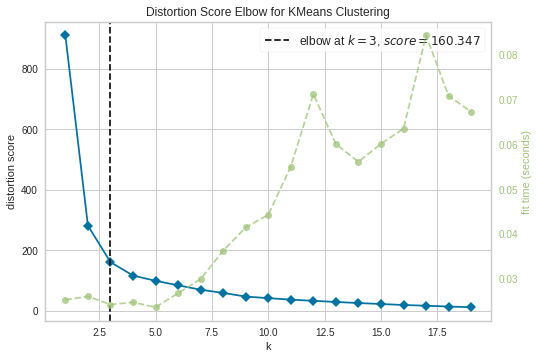

In [50]:
visualizer = kelbow_visualizer(KMeans(random_state=5), data_point, k=(1,20))
visualizer.show()
plt.show()

In [51]:
kmeans_totals_days = KMeans(n_clusters=3).fit(data_point)

for i in range(50):
    kmeans1 = KMeans(n_clusters=3).fit(data_point)
    if kmeans1.inertia_ < kmeans_totals_days.inertia_:
        kmeans_totals_days = kmeans1


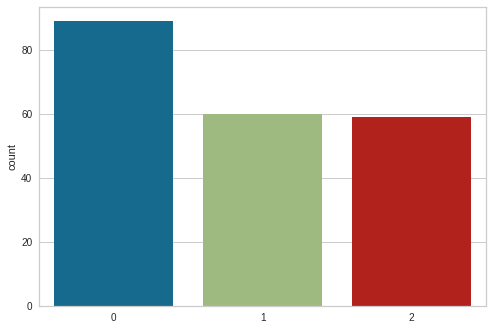

In [52]:
sns.countplot(x=kmeans_totals_days.labels_)
plt.show()

In [53]:
# labels_diffs = np.asarray(kmeans_totals_days.predict(data_point))

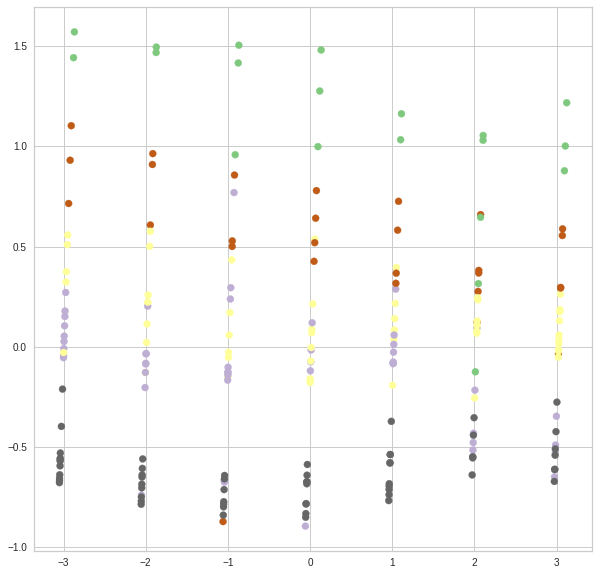

In [55]:
# pca = decomposition.PCA(n_components=2)
# X_reduced = pca.fit_transform(data_point)

# plt.figure(figsize=(10,10))
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=labels_diffs, cmap=plt.cm.get_cmap('Accent_r', 10))
# plt.show()

In [58]:
data_point= {}
data_point['Date'] = []
for i in range(208):
    data_point['Date'].append(i)
data_point['total_carbs'] = data["total_carbs"]
data_point['total_fat'] = data["total_fat"]
data_point['total_protein'] = data["total_protein"]
data_point['total_sodium'] = data["total_sodium"]
data_point['total_sugar'] = data["total_sugar"]
data_point['total_fiber'] = data["total_fiber"]



# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point = pd.DataFrame(data_point)
data_point

,Date,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
0,0,6196.0,2877.0,3379.0,58892.0,1915.0,499.0
1,1,39757.0,15061.0,22073.0,357434.0,10789.0,2113.0
2,2,40230.0,14044.0,22207.0,337045.0,9516.0,2265.0
3,3,39267.0,14585.0,21971.0,327624.0,9490.0,2246.0
4,4,53949.0,19930.0,29552.0,467812.0,12474.0,3510.0
...,...,...,...,...,...,...,...
203,203,66273.0,26095.0,34380.0,631687.0,14119.0,2955.0
204,204,74221.0,27560.0,42725.0,681933.0,16300.0,4168.0
205,205,45123.0,17046.0,26786.0,421763.0,10427.0,2719.0
206,206,14922.0,6191.0,8971.0,154710.0,3206.0,1006.0


In [59]:
data_point.describe()

,Date,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,103.500000,402465.975962,147793.504808,208415.278846,3.652665e+06,89363.427885,20931.778846
std,60.188592,163067.255878,58897.607774,86114.491822,1.510791e+06,40546.267692,8398.945831
min,0.000000,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
25%,51.750000,298017.750000,115177.750000,154178.250000,2.695013e+06,62112.000000,15757.000000
50%,103.500000,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
75%,155.250000,513977.250000,195192.750000,265260.000000,4.882590e+06,116033.000000,27021.000000
max,207.000000,861344.000000,339976.000000,353634.000000,6.525403e+06,318581.000000,34191.000000


In [60]:
data_point.describe([0.99])

,Date,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,103.500000,402465.975962,147793.504808,208415.278846,3.652665e+06,89363.427885,20931.778846
std,60.188592,163067.255878,58897.607774,86114.491822,1.510791e+06,40546.267692,8398.945831
min,0.000000,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,103.500000,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,204.930000,647603.010000,232542.020000,346694.900000,6.058767e+06,149690.650000,33741.710000
max,207.000000,861344.000000,339976.000000,353634.000000,6.525403e+06,318581.000000,34191.000000


In [61]:

data_point.filter(data_point['total_carbs']<=647603.010000)
data_point.loc[(data_point['total_carbs']>647603.010000),['total_carbs']] = 647603.010000
data_point.loc[(data_point['total_fat']>232542.020000),['total_fat']] = 232542.020000
data_point.loc[(data_point['total_sodium']>6.058767e+06),['total_sodium']] = 6.058767e+06
data_point.loc[(data_point['total_sugar']>149690.650000),['total_sugar']] = 149690.650000

In [62]:
data_point.describe([0.99])

,Date,total_carbs,total_fat,total_protein,total_sodium,total_sugar,total_fiber
count,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,103.500000,401391.384760,147265.591635,208415.278846,3.650349e+06,88536.898798,20931.778846
std,60.188592,160745.841333,57645.061816,86114.491822,1.506727e+06,37486.881349,8398.945831
min,0.000000,1685.000000,436.000000,1025.000000,1.541500e+04,318.000000,37.000000
50%,103.500000,417626.000000,149038.500000,215614.000000,3.723360e+06,89447.000000,21769.500000
99%,204.930000,647521.179300,232417.418600,346694.900000,6.055781e+06,149683.814500,33741.710000
max,207.000000,647603.010000,232542.020000,353634.000000,6.058767e+06,149690.650000,34191.000000


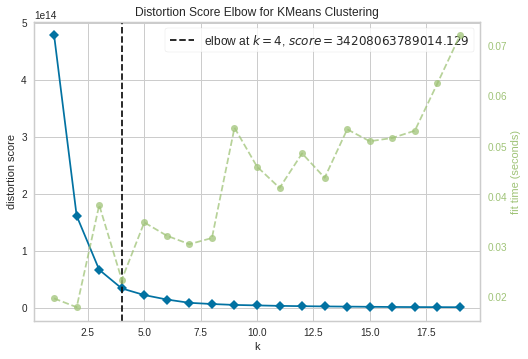

In [63]:
visualizer = kelbow_visualizer(KMeans(random_state=5), data_point, k=(1,20))
visualizer.show()
plt.show()

In [64]:
kmeans_totals_days = KMeans(n_clusters=4).fit(data_point)

for i in range(50):
    kmeans1 = KMeans(n_clusters=4).fit(data_point)
    if kmeans1.inertia_ < kmeans_totals_days.inertia_:
        kmeans_totals_days = kmeans1

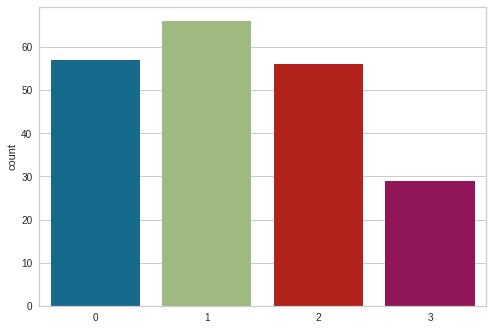

In [65]:
sns.countplot(x=kmeans_totals_days.labels_)
plt.show()

In [66]:
lbls = np.asarray(kmeans_totals_days.predict(data_point))

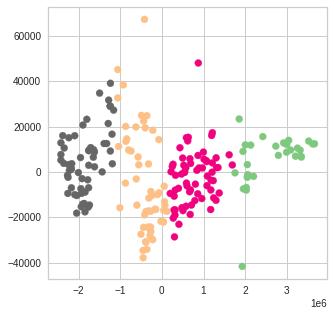

In [68]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_point)

plt.figure(figsize=(5,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=lbls, cmap=plt.cm.get_cmap('Accent_r', 10))
plt.show()

In [ ]:
copyData = data_point.copy()
lbls_copy = np.asarray(kmeans.predict(data_point))
copyData.insert(0, 'Cluster#', labels, True)
for x in copyData['Cluster#']:
    print(x)